***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [59]:
dados = pd.read_csv('dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Visualize o conteúdo do DataFrame

### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [60]:
classes = [
    dados.Renda.min(),
    2 * 788,
    5 * 788,
    15 * 788,
    25 * 788,
    dados.Renda.max()
]

classes

[np.int64(0), 1576, 3940, 11820, 19700, np.int64(200000)]

### 2º Definir os labels das classes

In [61]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [62]:
frequencia = pd.Series(
    pd.cut(x = dados.Renda,
           bins = classes,
           labels = labels,
           include_lowest = True)
).value_counts()
frequencia

Renda
E    49755
D    18602
C     7241
B      822
A      420
Name: count, dtype: int64

In [63]:
# Versão melhorada acima
# Criando a coluna de frequências
frequencia = pd.Series(
    pd.cut(x = dados.Renda,
           bins = classes,
           labels = labels,
           include_lowest = True)
).value_counts().sort_index()

# Transformando em um DataFrame para maior clareza
tabela_frequencias = pd.DataFrame({'Intervalo': frequencia.index, 'Frequência': frequencia.values})

# Exibir a tabela de frequências
tabela_frequencias


,Intervalo,Frequência
0,E,49755
1,D,18602
2,C,7241
3,B,822
4,A,420


### 4º Construir a coluna de percentuais

In [64]:
# Primeiro exemplo de criação

percentual = pd.Series(
    pd.cut(x = dados.Renda,
           bins = classes,
           labels = labels,
           include_lowest = True)
           .value_counts(normalize = True)) * 100

tabela_frequencias = pd.DataFrame({'Classe': percentual.index, 'Perrcentual %': percentual.values})

tabela_frequencias

,Classe,Perrcentual %
0,E,64.751432
1,D,24.208745
2,C,9.423477
3,B,1.069755
4,A,0.546590


In [65]:
# Segundo exemplo de criação

# Agrupar as rendas em classes definidas
renda_categorizada = pd.cut(
    x=dados['Renda'],  # Coluna de rendas
    bins=classes,      # Intervalos para agrupar as rendas
    labels=labels,     # Rótulos para as categorias
    include_lowest=True  # Incluir o menor valor no primeiro intervalo
)

# Calcular a frequência relativa e multiplicar por 100 para obter percentuais
percentual = renda_categorizada.value_counts(normalize=True) * 100

# Transformando em um DataFrame para maior clareza
tabela_percentual = pd.DataFrame({'Classe': percentual.index, 'Perrcentual %': percentual.values})

tabela_percentual


,Classe,Perrcentual %
0,E,64.751432
1,D,24.208745
2,C,9.423477
3,B,1.069755
4,A,0.546590


### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [66]:
dist_freq_renda = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
).round(2)

dist_freq_renda.sort_index(ascending=False)

,Frequência,Porcentagem (%)
Renda,,
A,420,0.55
B,822,1.07
C,7241,9.42
D,18602,24.21
E,49755,64.75


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<Axes: xlabel='Renda'>

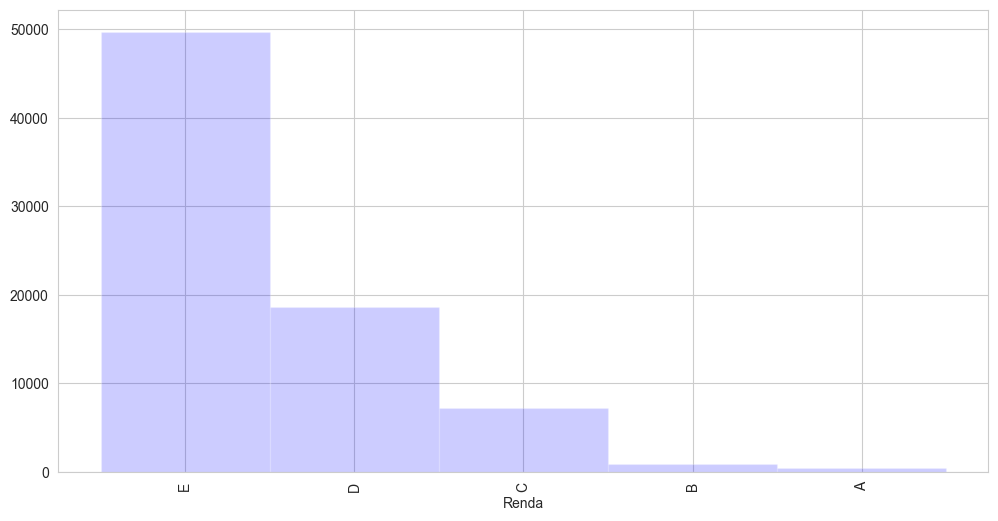

In [67]:
dist_freq_renda['Frequência'].plot.bar(width = 1, color = 'blue', alpha = 0.2, figsize = (12, 6))

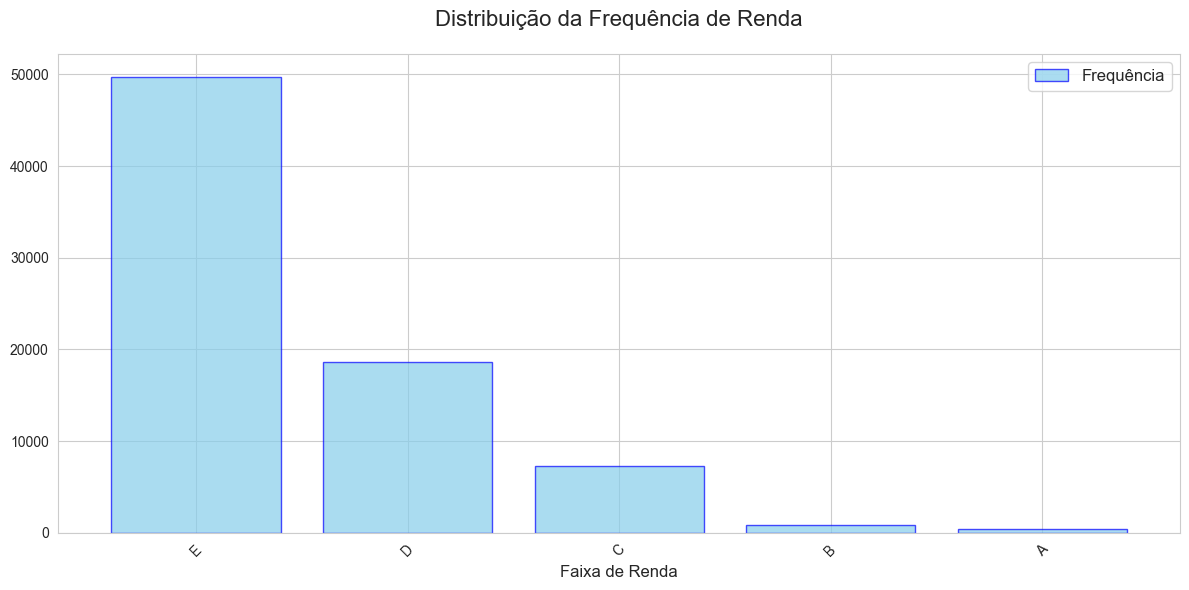

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração de estilo com o Seaborn
sns.set_style("whitegrid")

# Criando o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Plotando o gráfico de barras
dist_freq_renda['Frequência'].plot.bar(
    width=0.8,          # Ajuste de largura das barras
    color='skyblue',     # Cor mais suave e visível
    alpha=0.7,           # Ajuste de transparência
    edgecolor='blue',    # Contorno das barras
    ax=ax               # Plotando no eixo ax criado
)

# Melhorias visuais
ax.set_title("Distribuição da Frequência de Renda", fontsize=16, pad=20)
ax.set_xlabel("Faixa de Renda", fontsize=12)
#ax.set_ylabel("Frequência", fontsize=12)
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo X se necessário

# Adicionar legenda
ax.legend(title="", fontsize=12, title_fontsize=14)  # Personalizar a legenda

plt.tight_layout()  # Ajustar layout para evitar sobreposição

plt.show()


> ### Conclusões

Escreva suas conclusões aqui...

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

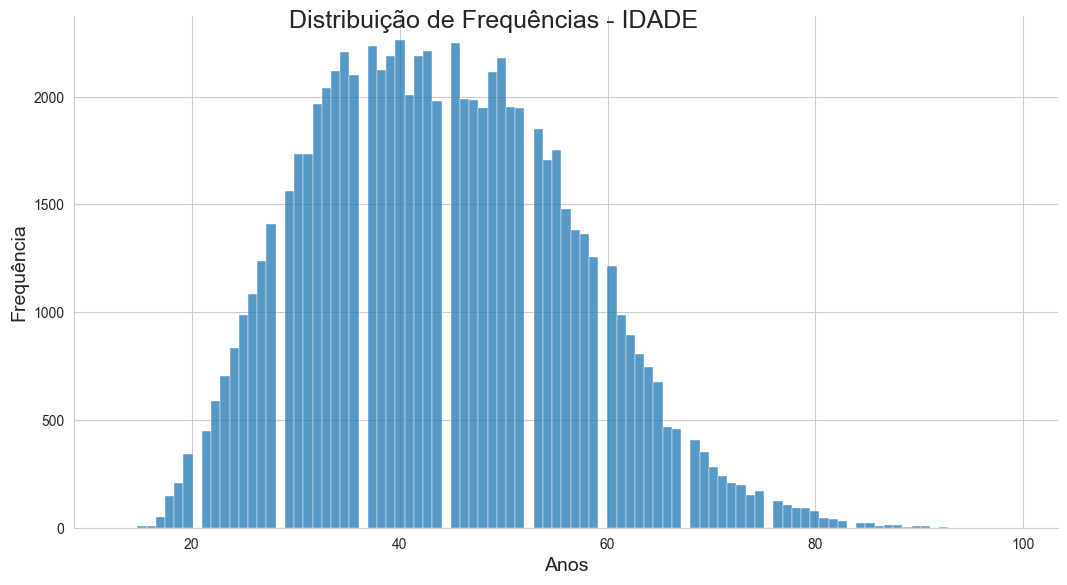

In [69]:
ax = sns.displot(dados['Idade'])

# Ajustando o tamanho da figura
ax.figure.set_size_inches(12, 6)

# Ajustando o título
ax.figure.suptitle('Distribuição de Frequências - IDADE', fontsize=18)

# Ajustando o rótulo do eixo X
ax.set_axis_labels('Anos', 'Frequência', fontsize=14)

# Exibir o gráfico
ax

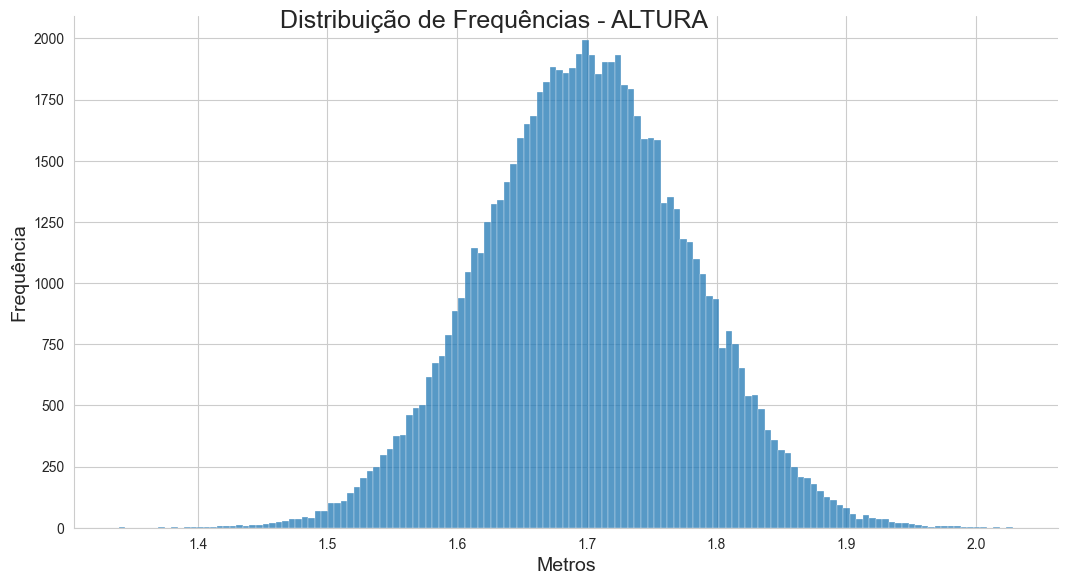

In [70]:
ax = sns.displot(dados['Altura'])

# Ajustando o tamanho da figura
ax.figure.set_size_inches(12, 6)

# Ajustando o título
ax.figure.suptitle('Distribuição de Frequências - ALTURA', fontsize=18)

# Ajustando o rótulo do eixo X
ax.set_axis_labels('Metros', 'Frequência', fontsize=14)

# Exibir o gráfico
ax


> ### Conclusões

Escreva suas conclusões aqui...

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

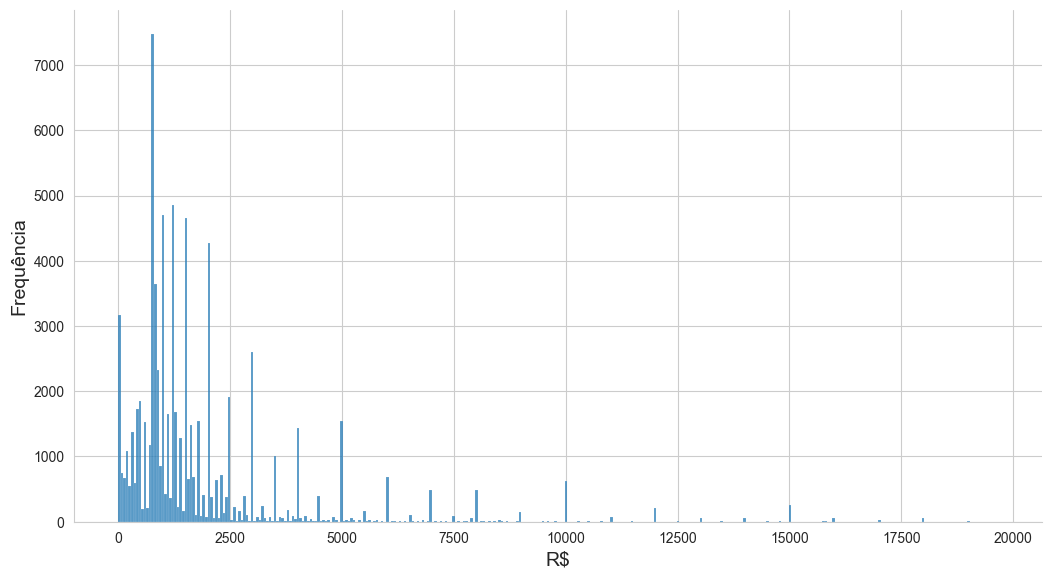

In [71]:
ax = sns.displot(dados.query('Renda < 20000')['Renda'])

# Ajustando o tamanho da figura
ax.figure.set_size_inches(12, 6)

# Ajustando o título
ax.set_titles('Distribuição de Frequências - RENDA - Pessoas com renda até R$ 20.000,00', fontesize = 18)

# Ajustando o rótulo do eixo X
ax.set_axis_labels('R$', 'Frequência', fontsize=14)

# Exibir o gráfico
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [72]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [73]:
# Opção do curso

frequencia = pd.crosstab(dados.Sexo, dados.Cor)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)

frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [74]:
# Opção pesquisada

frequencia = (
    pd.crosstab(dados.Sexo, dados.Cor)
    .rename(index=sexo, columns=cor)  # Renomeia linhas e colunas
)

frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [75]:
# Opção dada pelo curso

percentual = pd.crosstab(dados.Sexo, dados.Cor, normalize=True) * 100
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace =True)

percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [76]:
# opção pesquisada

percentual = (
    pd.crosstab(dados.Sexo, dados.Cor, normalize=True)  # Cria a tabela de porcentagens
    .mul(100)  # Multiplica os valores por 100 para obter percentual
    .rename(index=sexo, columns=cor)  # Renomeia linhas e colunas
)

percentual


Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [77]:
dados.Renda.mean()

np.float64(2000.3831988547631)

### Obtenha a mediana

In [78]:
dados.Renda.median()

np.float64(1200.0)

### Obtenha a moda

In [79]:
dados.Renda.mode()

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [80]:
# removido do panda (dados.Renda.mad())

desvio_medio_absoluto = (dados.Renda - dados.Renda.mean()).abs().mean()
desvio_medio_absoluto

np.float64(1526.4951371638058)

### Obtenha a variância

In [81]:
dados.Renda.var()

np.float64(11044906.006217021)

### Obtenha o desvio-padrão

In [82]:
dados.Renda.std()

np.float64(3323.3877303464037)

In [83]:
statistics_income = pd.Series({
    'Mean': dados.Renda.mean(),
    'Median': dados.Renda.median(),
    'Mode': dados.Renda.mode()[0],
    'Average Absolute Deviation':(dados.Renda - dados.Renda.mean()).abs().mean(),
    'Variance': dados.Renda.var(),
    'Standard deviation': dados.Renda.std()
}).round(2)

statistics_income

Mean                              2000.38
Median                            1200.00
Mode                               788.00
Average Absolute Deviation        1526.50
Variance                      11044906.01
Standard deviation                3323.39
dtype: float64

In [84]:
statistics_income_df = pd.DataFrame({
    'Statistics': ['Mean', 'Median', 'Mode', 'Average Absolute Deviation', 'Variance', 'Standard deviation'],
    'Value': [dados.Renda.mean(),
              dados.Renda.median(), 
              dados.Renda.mode()[0], 
              (dados.Renda - dados.Renda.mean()).abs().mean(),
              dados.Renda.var(),
              dados.Renda.std()]
}).round(2)

statistics_income_df

,Statistics,Value
0,Mean,2000.38
1,Median,1200.00
2,Mode,788.00
3,Average Absolute Deviation,1526.50
4,Variance,11044906.01
5,Standard deviation,3323.39


### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [85]:
renda_estatisc_sexo_cor = pd.crosstab(dados.Cor, dados.Sexo,
                                      values = dados.Renda,
                                      aggfunc = {'mean', 'median', 'max'})
renda_estatisc_sexo_cor.rename(index = cor, inplace = True)
renda_estatisc_sexo_cor.rename(columns = sexo, inplace = True)
renda_estatisc_sexo_cor

max                  mean                 median         
Sexo     Masculino Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                     
Indígena     10000   120000  1081.710938  2464.386139     797.5    788.0
Branca      200000   100000  2925.744435  2109.866750    1700.0   1200.0
Preta        50000    23000  1603.861687  1134.596400    1200.0    800.0
Amarela      50000    20000  4758.251064  3027.341880    2800.0   1500.0
Parda       100000    30000  1659.577425  1176.758516    1200.0    800.0

In [86]:
'''
pivot_table: Ele oferece uma maneira mais clara e direta
de criar tabelas dinâmicas como a que você precisa, 
permitindo especificar índices, 
colunas e funções de agregação de forma explícita.

'''

renda_estatisc_sexo_cor = dados.pivot_table(
    index='Cor',
    columns='Sexo',
    values='Renda',
    aggfunc=['mean', 'median', 'max']
).round(2)

renda_estatisc_sexo_cor.rename(index=cor, columns=sexo, inplace=True)
renda_estatisc_sexo_cor


mean             median                max         
Sexo     Masculino Feminino Masculino Feminino Masculino Feminino
Cor                                                              
Indígena   1081.71  2464.39     797.5    788.0     10000   120000
Branca     2925.74  2109.87    1700.0   1200.0    200000   100000
Preta      1603.86  1134.60    1200.0    800.0     50000    23000
Amarela    4758.25  3027.34    2800.0   1500.0     50000    20000
Parda      1659.58  1176.76    1200.0    800.0    100000    30000

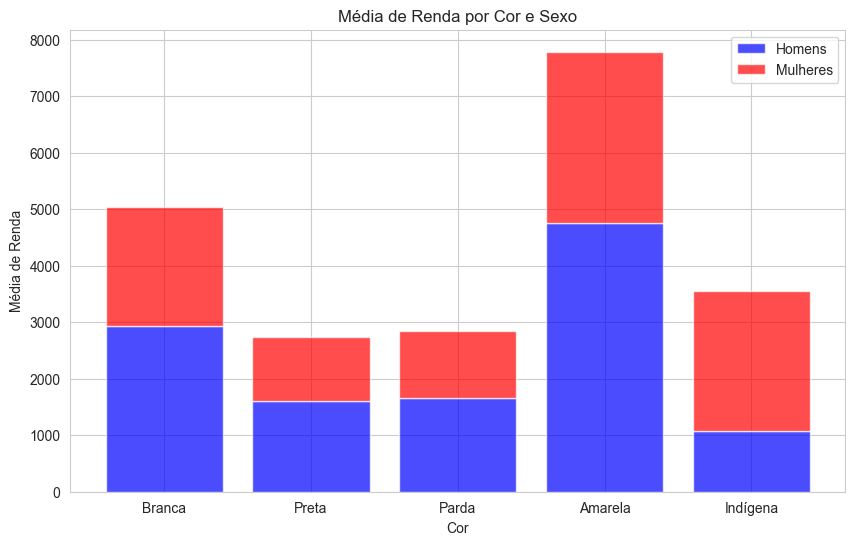

In [87]:
import matplotlib.pyplot as plt

# Dados fictícios para ilustração (substitua pelos seus dados reais)
cores = ['Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
media_renda_homem = [2925.74, 1603.86, 1659.58, 4758.25, 1081.71]
media_renda_mulher = [2109.87, 1134.60, 1176.76, 3027.34, 2464.39]

# Configuração do gráfico
plt.figure(figsize=(10, 6))
plt.bar(cores, media_renda_homem, label='Homens', color='b', alpha=0.7)
plt.bar(cores, media_renda_mulher, label='Mulheres', color='r', alpha=0.7, bottom=media_renda_homem)
plt.xlabel('Cor')
plt.ylabel('Média de Renda')
plt.title('Média de Renda por Cor e Sexo')
plt.legend()
plt.show()


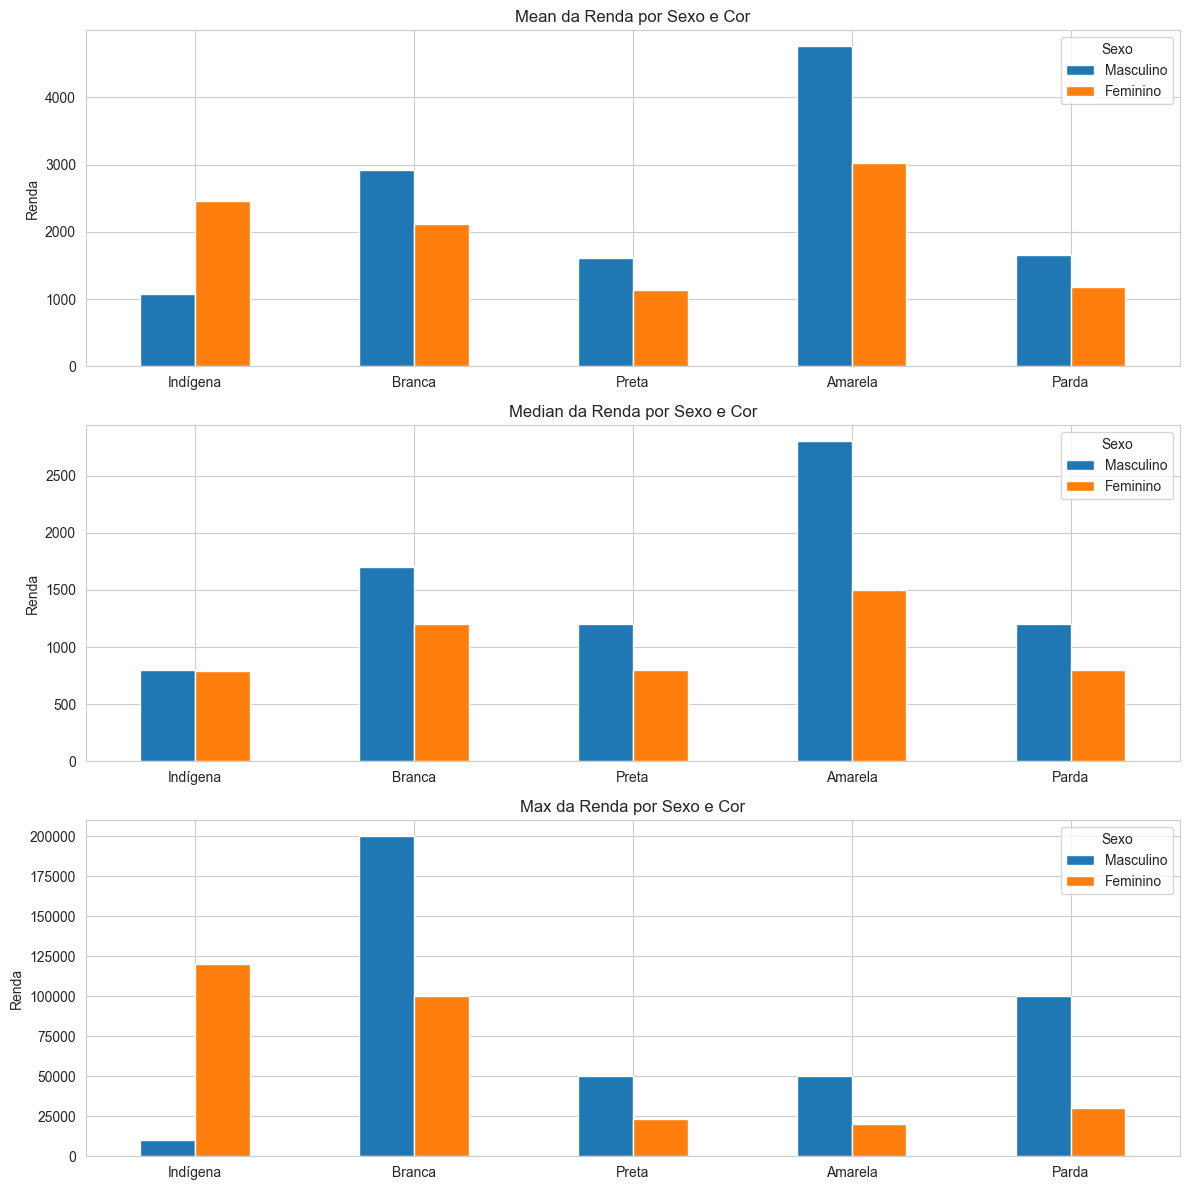

In [88]:
# Resetar o index para facilitar o plot
renda_estatisc_sexo_cor_reset = renda_estatisc_sexo_cor.reset_index()

# Gráfico de barras agrupadas
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

# Loop para cada métrica (mean, median, max)
for i, metric in enumerate(['mean', 'median', 'max']):
    renda_estatisc_sexo_cor_reset[metric].plot(kind='bar', ax=ax[i])
    ax[i].set_title(f'{metric.capitalize()} da Renda por Sexo e Cor')
    ax[i].set_ylabel('Renda')
    ax[i].set_xticks(range(len(renda_estatisc_sexo_cor_reset)))
    ax[i].set_xticklabels(renda_estatisc_sexo_cor_reset['Cor'], rotation=0)

plt.tight_layout()
plt.show()





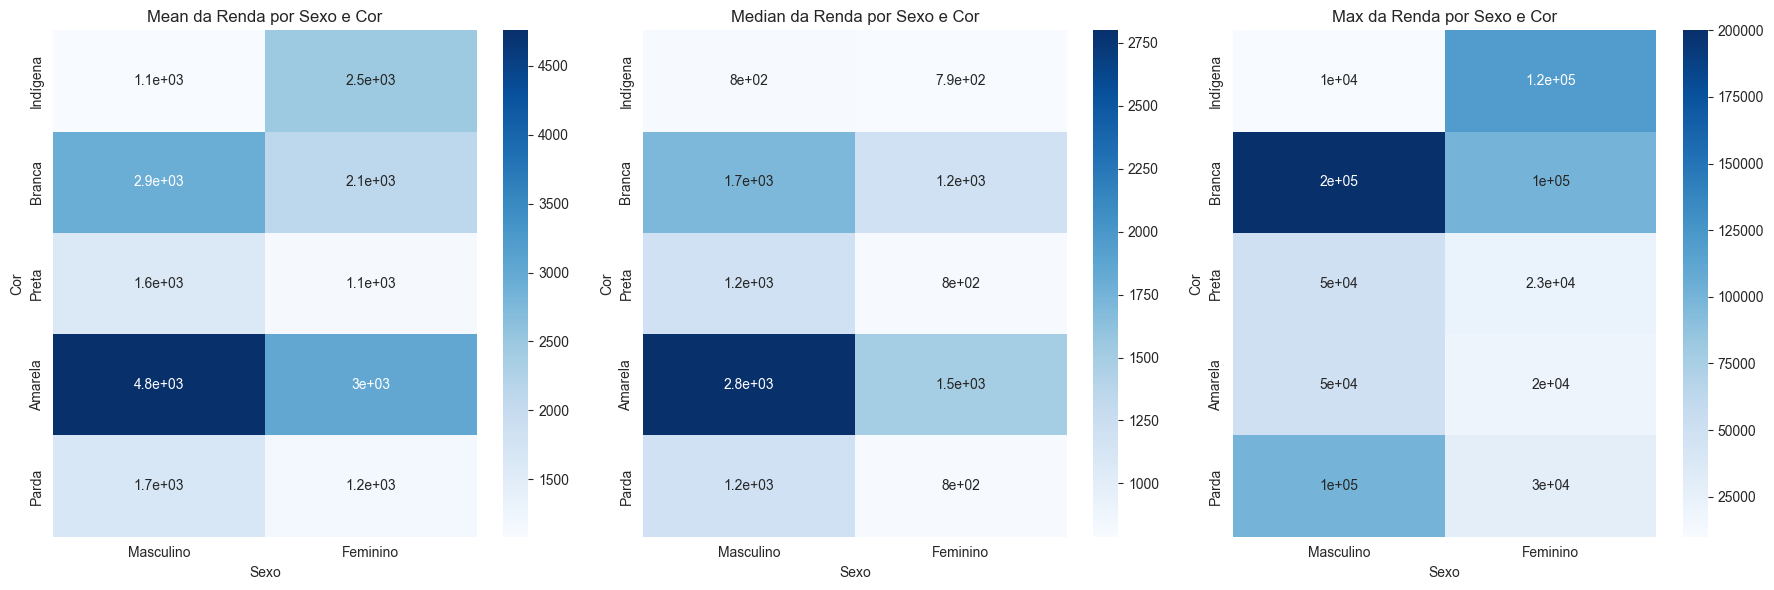

In [89]:
# Resetar o index para facilitar o uso de heatmap
renda_estatisc_sexo_cor_reset = renda_estatisc_sexo_cor.reset_index()

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Loop para cada métrica (mean, median, max)
for i, metric in enumerate(['mean', 'median', 'max']):
    sns.heatmap(renda_estatisc_sexo_cor[metric], annot=True, cmap='Blues', ax=ax[i], cbar=True)
    ax[i].set_title(f'{metric.capitalize()} da Renda por Sexo e Cor')
    ax[i].set_xlabel('Sexo')
    ax[i].set_ylabel('Cor')

plt.tight_layout()
plt.show()


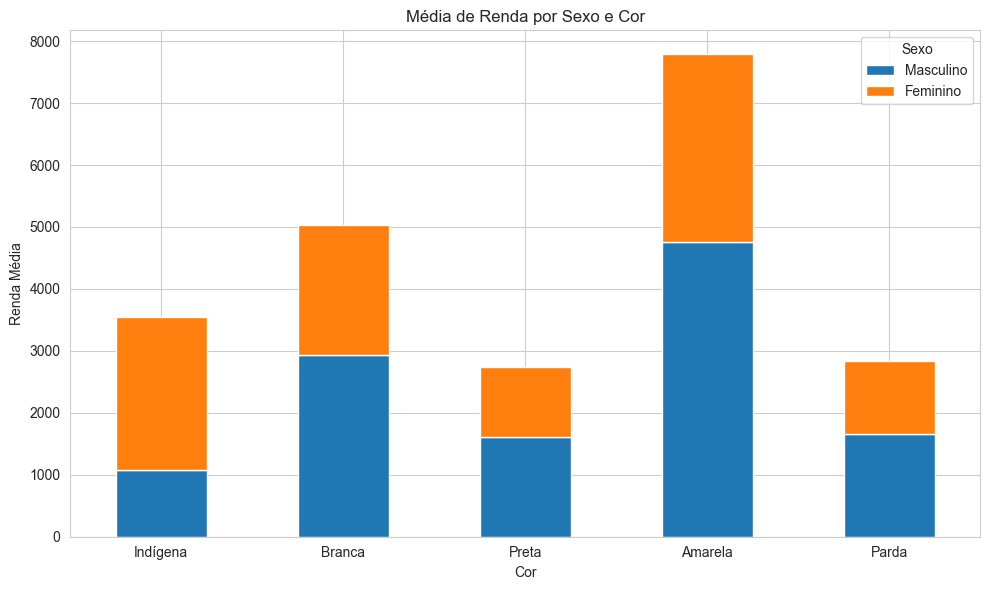

In [90]:
import matplotlib.pyplot as plt

# Gráfico de barras empilhadas
renda_estatisc_sexo_cor['mean'].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Média de Renda por Sexo e Cor')
plt.ylabel('Renda Média')
plt.xlabel('Cor')
plt.xticks(rotation=0)
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()


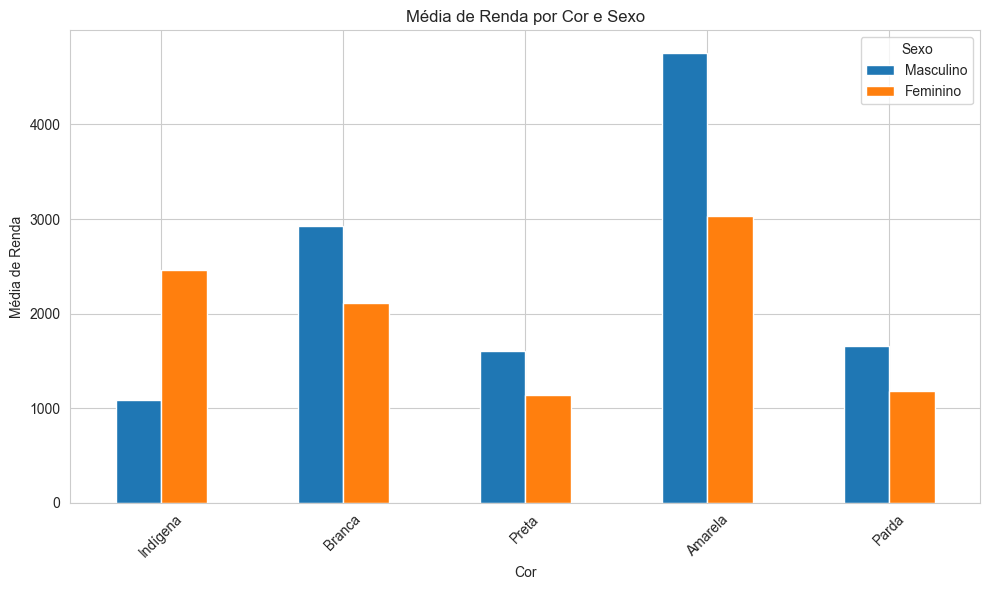

In [91]:
import matplotlib.pyplot as plt

# Selecionar apenas uma métrica para plotar (por exemplo, 'mean')
mean_renda = renda_estatisc_sexo_cor['mean']

# Plotar gráfico de barras agrupadas
mean_renda.plot(kind='bar', figsize=(10, 6))
plt.title('Média de Renda por Cor e Sexo')
plt.xlabel('Cor')
plt.ylabel('Média de Renda')
plt.legend(title='Sexo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


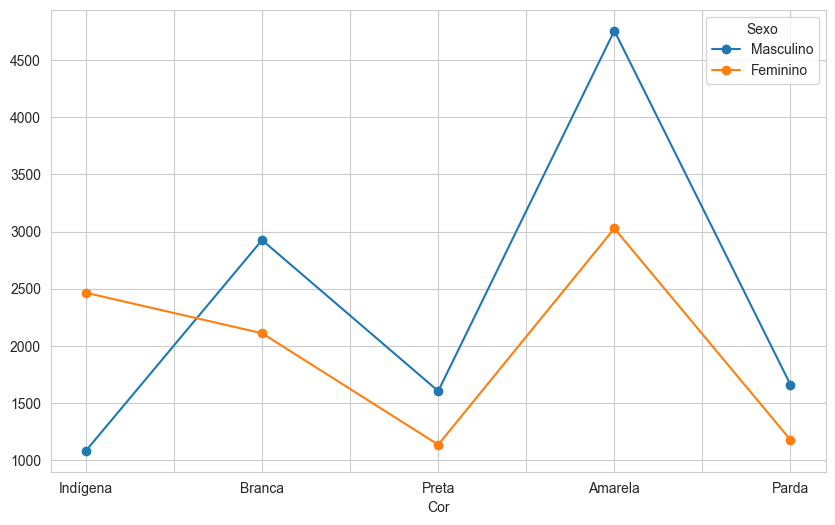

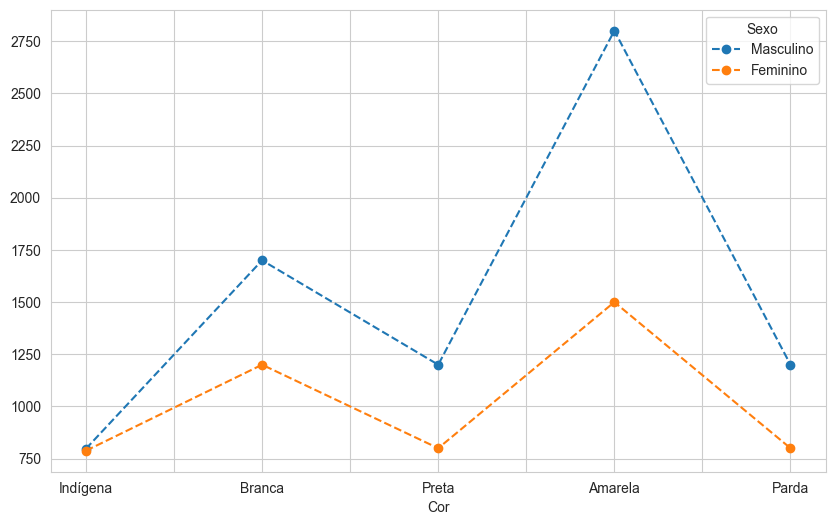

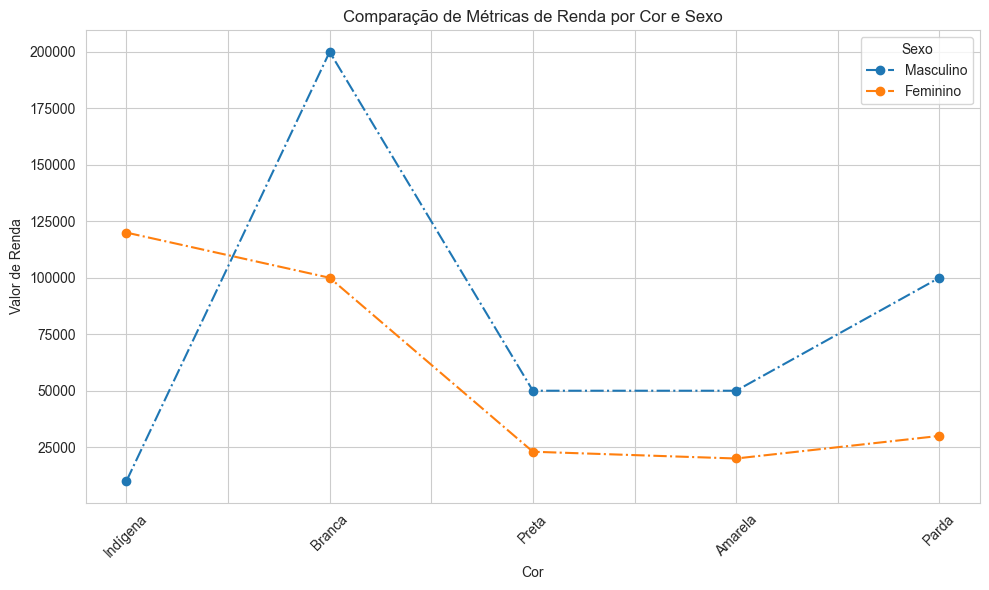

In [92]:
# Plotando as três métricas (mean, median, max) usando gráficos de linha
renda_estatisc_sexo_cor.xs('mean', axis=1, level=0).plot(kind='line', marker='o', figsize=(10, 6))
renda_estatisc_sexo_cor.xs('median', axis=1, level=0).plot(kind='line', marker='o', figsize=(10, 6), linestyle='--')
renda_estatisc_sexo_cor.xs('max', axis=1, level=0).plot(kind='line', marker='o', figsize=(10, 6), linestyle='-.')

plt.title('Comparação de Métricas de Renda por Cor e Sexo')
plt.xlabel('Cor')
plt.ylabel('Valor de Renda')
plt.legend(title='Sexo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


> ### Conclusões

O intuíto acima é conhecer novos gráficos e formas de avaliar o que foi proposto. (Portuguese)

The aim above is to get to know new graphs and ways of evaluating what has been proposed. (English)


### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [93]:
renda_dispersao_por_sexo_cor = pd.crosstab(dados.Cor, dados.Sexo,
                                           aggfunc = {'mad', 'var', 'std'},
                                           values = dados.Renda).round(2)
renda_dispersao_por_sexo_cor.rename(index = cor, inplace = True)
renda_dispersao_por_sexo_cor.rename(columns = sexo, inplace = True)
renda_dispersao_por_sexo_cor

AttributeError: 'SeriesGroupBy' object has no attribute 'mad'

In [ ]:
renda_dispersao_por_sexo_cor = pd.crosstab(dados.Cor, dados.Sexo,
                                           aggfunc = {'var', 'std', 'mean'},
                                           values = dados.Renda).round(2)
renda_dispersao_por_sexo_cor.rename(index = cor, inplace = True)
renda_dispersao_por_sexo_cor.rename(columns = sexo, inplace = True)
renda_dispersao_por_sexo_cor



mean                std                    var              
Sexo     Masculino Feminino Masculino  Feminino    Masculino      Feminino
Cor                                                                       
Indígena   1081.71  2464.39   1204.09  11957.50   1449841.13  1.429818e+08
Branca     2925.74  2109.87   4750.79   3251.01  22570023.41  1.056909e+07
Preta      1603.86  1134.60   1936.31   1349.80   3749293.59  1.821960e+06
Amarela    4758.25  3027.34   5740.82   3731.17  32957069.62  1.392166e+07
Parda      1659.58  1176.76   2312.09   1596.23   5345747.15  2.547960e+06

In [ ]:
import numpy as np

# Função personalizada para desvio absoluto da média
def desvio_absoluto_medio(x):
    return np.mean(np.abs(x - np.mean(x)))

# Agrupando os dados por 'Cor' e 'Sexo'
grouped = dados.groupby(['Cor', 'Sexo'])

# Calculando as agregações
renda_dispersao_por_sexo_cor = pd.DataFrame({
    'Desvio Padrão': grouped['Renda'].std(),
    'Variância': grouped['Renda'].var(),
    'Desvio Absoluto Médio': grouped['Renda'].apply(desvio_absoluto_medio)
}).round(2)

# Renomeando os índices de forma mais eficiente usando 'map'
renda_dispersao_por_sexo_cor.index = renda_dispersao_por_sexo_cor.index.set_levels([
    renda_dispersao_por_sexo_cor.index.levels[0].map(cor),  # Renomeando nível 'Cor'
    renda_dispersao_por_sexo_cor.index.levels[1].map(sexo)  # Renomeando nível 'Sexo'
])

# Exibindo o DataFrame resultante
renda_dispersao_por_sexo_cor




Desvio Padrão     Variância  Desvio Absoluto Médio
Cor      Sexo                                                         
Indígena Masculino        1204.09  1.449841e+06                 798.91
         Feminino        11957.50  1.429818e+08                3007.89
Branca   Masculino        4750.79  2.257002e+07                2261.01
         Feminino         3251.01  1.056909e+07                1670.97
Preta    Masculino        1936.31  3.749294e+06                 975.60
         Feminino         1349.80  1.821960e+06                 705.45
Amarela  Masculino        5740.82  3.295707e+07                3709.60
         Feminino         3731.17  1.392166e+07                2549.15
Parda    Masculino        2312.09  5.345747e+06                1125.83
         Feminino         1596.23  2.547960e+06                 811.58

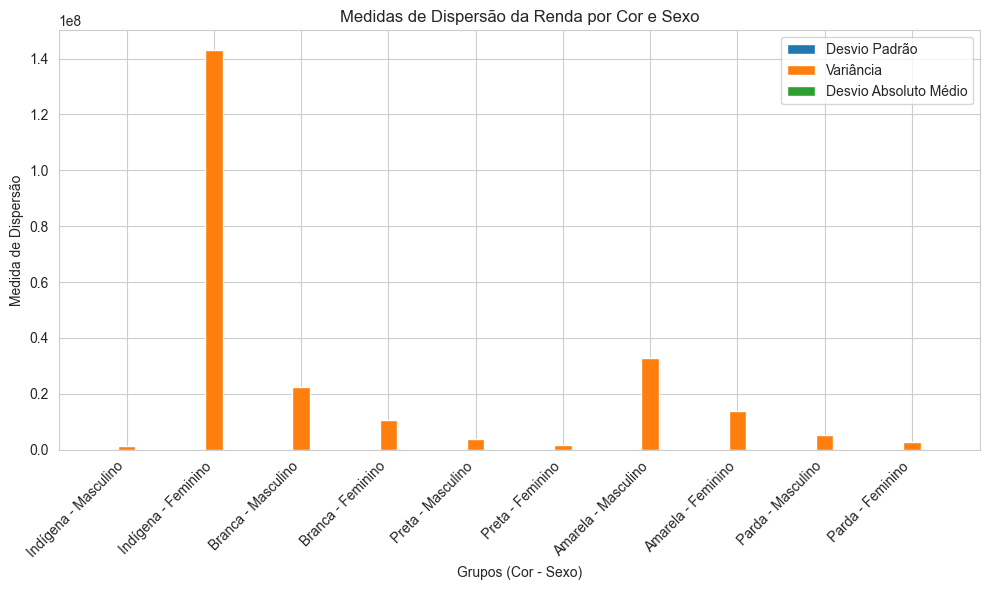

In [ ]:
'''
Aqui nós conseguimos visualizar de forma mais clara a variâcia da renda
em relação a sexo e cor.

'''

import matplotlib.pyplot as plt
import numpy as np

# Preparando os dados para o gráfico
renda_dispersao_por_sexo_cor.reset_index(inplace=True)
grupos = renda_dispersao_por_sexo_cor['Cor'] + " - " + renda_dispersao_por_sexo_cor['Sexo']

# Largura das barras
largura = 0.2
x = np.arange(len(grupos))  # Posições no eixo X

# Criando o gráfico de barras agrupadas
plt.figure(figsize=(10,6))

plt.bar(x - largura, renda_dispersao_por_sexo_cor['Desvio Padrão'], width=largura, label='Desvio Padrão')
plt.bar(x, renda_dispersao_por_sexo_cor['Variância'], width=largura, label='Variância')
plt.bar(x + largura, renda_dispersao_por_sexo_cor['Desvio Absoluto Médio'], width=largura, label='Desvio Absoluto Médio')

# Adicionando rótulos e título
plt.xlabel('Grupos (Cor - Sexo)')
plt.ylabel('Medida de Dispersão')
plt.title('Medidas de Dispersão da Renda por Cor e Sexo')
plt.xticks(x, grupos, rotation=45, ha='right')
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()


In [ ]:
renda_dispersao_por_sexo_cor.loc[('Indígena', 'Feminino')]


KeyError: 'Feminino'

In [ ]:
renda_dispersao_por_sexo_cor.mean()


TypeError: Could not convert ['MasculinoFemininoMasculinoFemininoMasculinoFemininoMasculinoFemininoMasculinoFeminino'] to numeric

In [ ]:
renda_dispersao_por_sexo_cor.sort_values(by='Desvio Padrão', ascending=False)


,Cor,Sexo,Desvio Padrão,Variância,Desvio Absoluto Médio
1,Indígena,Feminino,11957.50,1.429818e+08,3007.89
6,Amarela,Masculino,5740.82,3.295707e+07,3709.60
2,Branca,Masculino,4750.79,2.257002e+07,2261.01
7,Amarela,Feminino,3731.17,1.392166e+07,2549.15
3,Branca,Feminino,3251.01,1.056909e+07,1670.97
8,Parda,Masculino,2312.09,5.345747e+06,1125.83
4,Preta,Masculino,1936.31,3.749294e+06,975.60
9,Parda,Feminino,1596.23,2.547960e+06,811.58
5,Preta,Feminino,1349.80,1.821960e+06,705.45
0,Indígena,Masculino,1204.09,1.449841e+06,798.91


> ### Conclusões

Existe uma diferença enorme em renda entre os Indígenas.
(English) There is a huge difference in income between indigenous people.

Brancos, Pretos(as) e Pardas, a diferença de renda entre os genêros são parecidas.
(English) Whites, Blacks and Browns, the difference in income between the genders is similar.

Amarelos(as) existe uma diferença um pouco maior das demais citadas acima.
(English) There is a slightly greater difference between yellow people and the others mentioned above.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

C:\Users\BI\AppData\Local\Temp\ipykernel_10184\626352213.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize = 12)


<Axes: title={'center': 'Box-plot da RENDA por SEXO e COR'}, xlabel='R$', ylabel='Cor'>

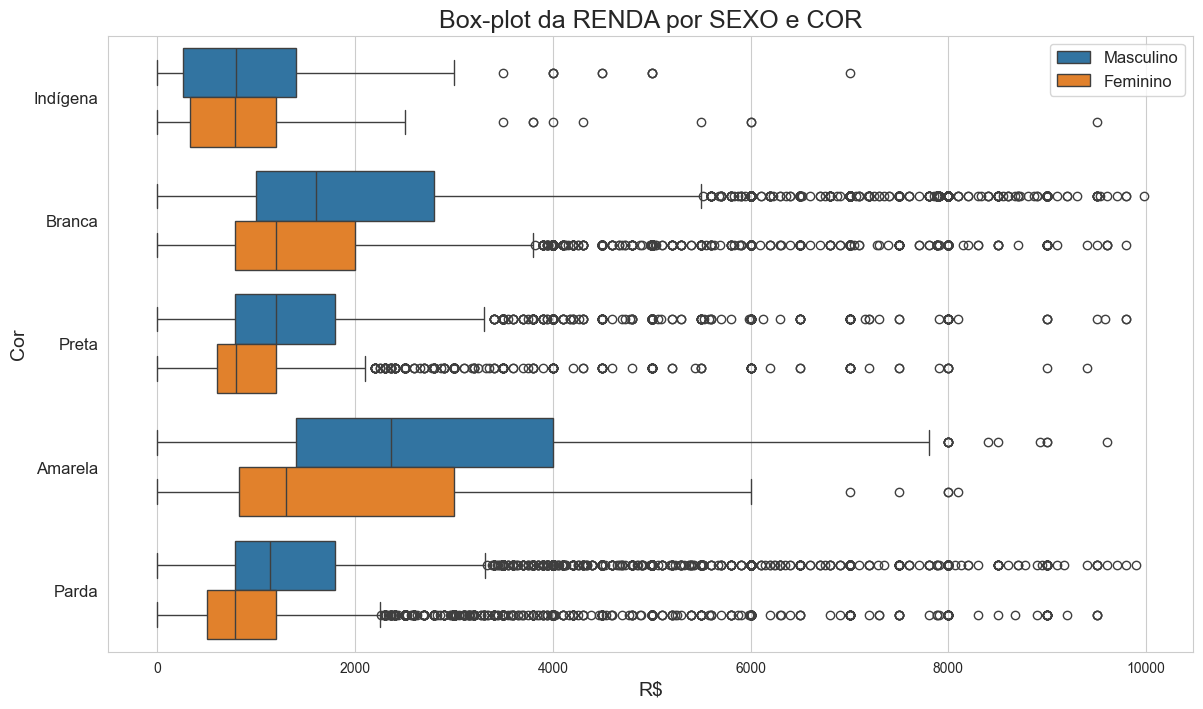

In [94]:
ax = sns.boxplot(x = 'Renda', y = 'Cor', hue = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h')
ax.figure.set_size_inches(14, 8)
ax.set_title('Box-plot da RENDA por SEXO e COR', fontsize = 18)
ax.set_xlabel('R$', fontsize = 14)


ax.set_ylabel('Cor', fontsize = 14)
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize = 12)


handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize = 12)

ax

<Axes: title={'center': 'Box-plot da RENDA por SEXO e COR'}, xlabel='R$', ylabel='Cor'>

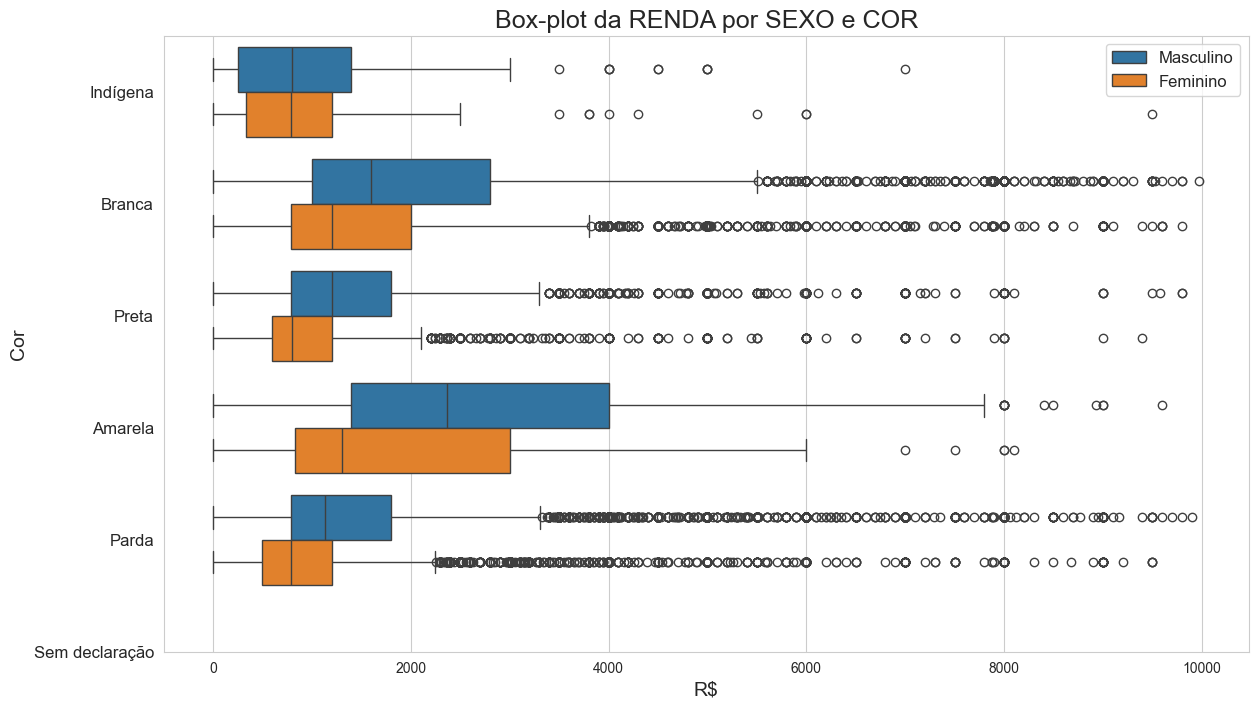

In [95]:
# Criando o gráfico boxplot
ax = sns.boxplot(x='Renda', y='Cor', hue='Sexo', data=dados.query('Renda < 10000'), orient='h')

# Ajustando o tamanho do gráfico
ax.figure.set_size_inches(14, 8)

# Definindo o título e os rótulos dos eixos
ax.set_title('Box-plot da RENDA por SEXO e COR', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Cor', fontsize=14)

# Ajustando os ticks do eixo y para corresponder ao número de categorias
ax.set_yticks(range(6))  # Assumindo que temos 6 categorias no eixo y
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)

# Ajustando a legenda
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

# Mostrando o gráfico
ax


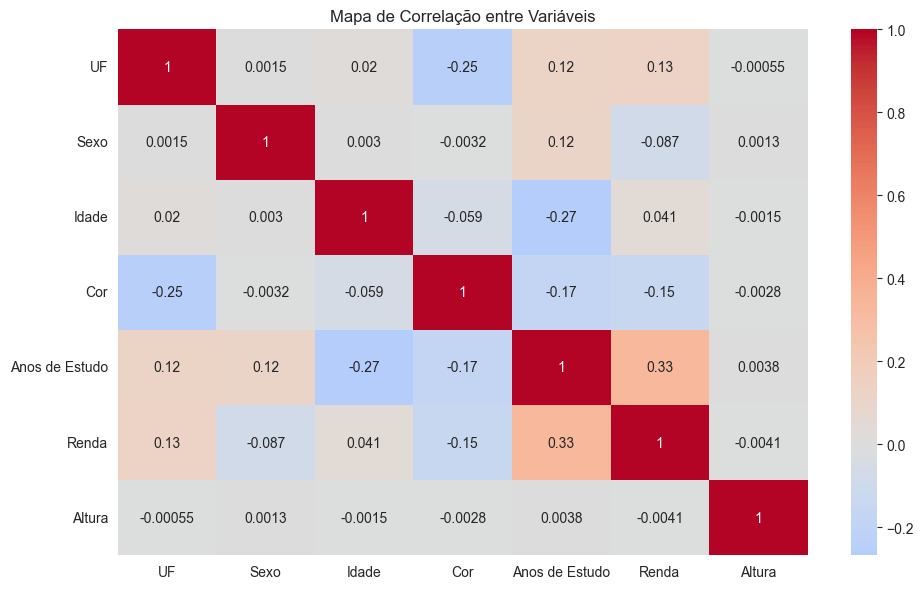

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando a matriz de correlação
correlacao = dados.corr()

# Criando o heatmap da matriz de correlação
plt.figure(figsize=(10,6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', center=0)

# Adicionando título
plt.title('Mapa de Correlação entre Variáveis')

# Exibindo o gráfico
plt.tight_layout()
plt.show()


> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [ ]:
from scipy import stats

percentual = stats.percentileofscore(dados.Renda, 788, kind='weak')
print('{0: .2f}%'.format(percentual))


 28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [ ]:
valor = dados.Renda.quantile(.99)
print('R${0: .2f}'.format(valor))

R$ 15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [ ]:
renda_estatisc_sexo_estudo = pd.crosstab(dados['Anos de Estudo'],
                                         dados.Sexo,
                                         aggfunc = {'mean', 'median', 'max', 'std'},
                                         values = dados.Renda).round(2)
renda_estatisc_sexo_estudo.rename(index = anos_de_estudo, inplace = True)
renda_estatisc_sexo_estudo.rename(columns = sexo, inplace = True)
renda_estatisc_sexo_estudo

max               mean           \
Sexo                           Masculino Feminino Masculino Feminino   
Anos de Estudo                                                         
Sem instrução e menos de 1 ano     30000    10000    799.49   516.20   
1 ano                              30000     2000    895.63   492.77   
2 anos                             40000     4000    931.18   529.91   
3 anos                             80000     3500   1109.20   546.85   
4 anos                             50000    10000   1302.33   704.28   
5 anos                             35000     8000   1338.65   781.39   
6 anos                             25000     6000   1448.88   833.73   
7 anos                             40000     9000   1465.50   830.75   
8 anos                             30000    18000   1639.40   933.62   
9 anos                             60000    20000   1508.04   868.02   
10 anos                            45000     6000   1731.27   925.92   
11 anos                           200000   100000   2117.06  1286.79   
12 anos                            30000   120000   2470.33  1682.31   
13 anos                            25000    20000   3195.10  1911.73   
14 anos                            50000    20000   3706.62  2226.46   
15 anos ou mais                   200000   100000   6134.28  3899.51   
Não determinados                    7000     3000   1295.76   798.17   

                                  median                std           
Sexo                           Masculino Feminino Masculino Feminino  
Anos de Estudo                                                        
Sem instrução e menos de 1 ano     700.0    390.0   1023.90   639.31  
1 ano                              788.0    400.0   1331.95   425.29  
2 anos                             788.0    450.0   1435.17   498.23  
3 anos                             800.0    500.0   2143.80   424.12  
4 anos                            1000.0    788.0   1419.82   629.55  
5 anos                            1045.0    788.0   1484.65   635.78  
6 anos                            1200.0    788.0   1476.63   574.55  
7 anos                            1200.0    788.0   1419.71   602.04  
8 anos                            1300.0    800.0   1515.58   896.78  
9 anos                            1200.0    788.0   2137.66   973.22  
10 anos                           1218.0    800.0   2078.61   620.61  
11 anos                           1500.0   1000.0   2676.54  1819.04  
12 anos                           1800.0   1200.0   2268.08  4851.83  
13 anos                           2400.0   1300.0   2797.12  2053.79  
14 anos                           2500.0   1600.0   3987.21  2064.08  
15 anos ou mais                   4000.0   2800.0   7447.61  4212.77  
Não determinados                  1200.0    788.0    979.65   459.99

In [ ]:
import pandas as pd

def calcular_estatisticas_renda_por_sexo_e_estudo(dados, anos_de_estudo, sexo):
    """
    Calcula estatísticas descritivas (média, mediana, máximo e desvio padrão)
    da renda para diferentes níveis de anos de estudo e sexo.
    
    Parâmetros:
    - dados: DataFrame contendo as colunas 'Anos de Estudo', 'Sexo' e 'Renda'.
    - anos_de_estudo: Dicionário para renomear os índices dos anos de estudo.
    - sexo: Dicionário para renomear as colunas de sexo.
    
    Retorna:
    - DataFrame com as estatísticas descritivas agregadas por 'Anos de Estudo' e 'Sexo'.
    """

    # Calcula a tabela cruzada com as estatísticas agregadas
    estatisticas_renda = pd.crosstab(
        index = dados['Anos de Estudo'],  # Linhas por anos de estudo
        columns = dados['Sexo'],          # Colunas por sexo
        aggfunc ={'mean', 'median', 'max', 'std'},  # Funções de agregação
        values = dados['Renda']           # Coluna alvo para agregação
    ).round(2)

    # Renomeia os índices e as colunas para algo mais legível
    estatisticas_renda.rename(index = anos_de_estudo, inplace = True)
    estatisticas_renda.rename(columns = sexo, inplace = True)
    
    return estatisticas_renda

# Exemplo de uso da função:
estatisticas_renda = calcular_estatisticas_renda_por_sexo_e_estudo(dados, anos_de_estudo, sexo)
estatisticas_renda


max               mean           \
Sexo                           Masculino Feminino Masculino Feminino   
Anos de Estudo                                                         
Sem instrução e menos de 1 ano     30000    10000    799.49   516.20   
1 ano                              30000     2000    895.63   492.77   
2 anos                             40000     4000    931.18   529.91   
3 anos                             80000     3500   1109.20   546.85   
4 anos                             50000    10000   1302.33   704.28   
5 anos                             35000     8000   1338.65   781.39   
6 anos                             25000     6000   1448.88   833.73   
7 anos                             40000     9000   1465.50   830.75   
8 anos                             30000    18000   1639.40   933.62   
9 anos                             60000    20000   1508.04   868.02   
10 anos                            45000     6000   1731.27   925.92   
11 anos                           200000   100000   2117.06  1286.79   
12 anos                            30000   120000   2470.33  1682.31   
13 anos                            25000    20000   3195.10  1911.73   
14 anos                            50000    20000   3706.62  2226.46   
15 anos ou mais                   200000   100000   6134.28  3899.51   
Não determinados                    7000     3000   1295.76   798.17   

                                  median                std           
Sexo                           Masculino Feminino Masculino Feminino  
Anos de Estudo                                                        
Sem instrução e menos de 1 ano     700.0    390.0   1023.90   639.31  
1 ano                              788.0    400.0   1331.95   425.29  
2 anos                             788.0    450.0   1435.17   498.23  
3 anos                             800.0    500.0   2143.80   424.12  
4 anos                            1000.0    788.0   1419.82   629.55  
5 anos                            1045.0    788.0   1484.65   635.78  
6 anos                            1200.0    788.0   1476.63   574.55  
7 anos                            1200.0    788.0   1419.71   602.04  
8 anos                            1300.0    800.0   1515.58   896.78  
9 anos                            1200.0    788.0   2137.66   973.22  
10 anos                           1218.0    800.0   2078.61   620.61  
11 anos                           1500.0   1000.0   2676.54  1819.04  
12 anos                           1800.0   1200.0   2268.08  4851.83  
13 anos                           2400.0   1300.0   2797.12  2053.79  
14 anos                           2500.0   1600.0   3987.21  2064.08  
15 anos ou mais                   4000.0   2800.0   7447.61  4212.77  
Não determinados                  1200.0    788.0    979.65   459.99

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'Box-plot da RENDA por SEXO e ANOS DE ESTUDO'}, xlabel='R$', ylabel='Anos de Estudo'>

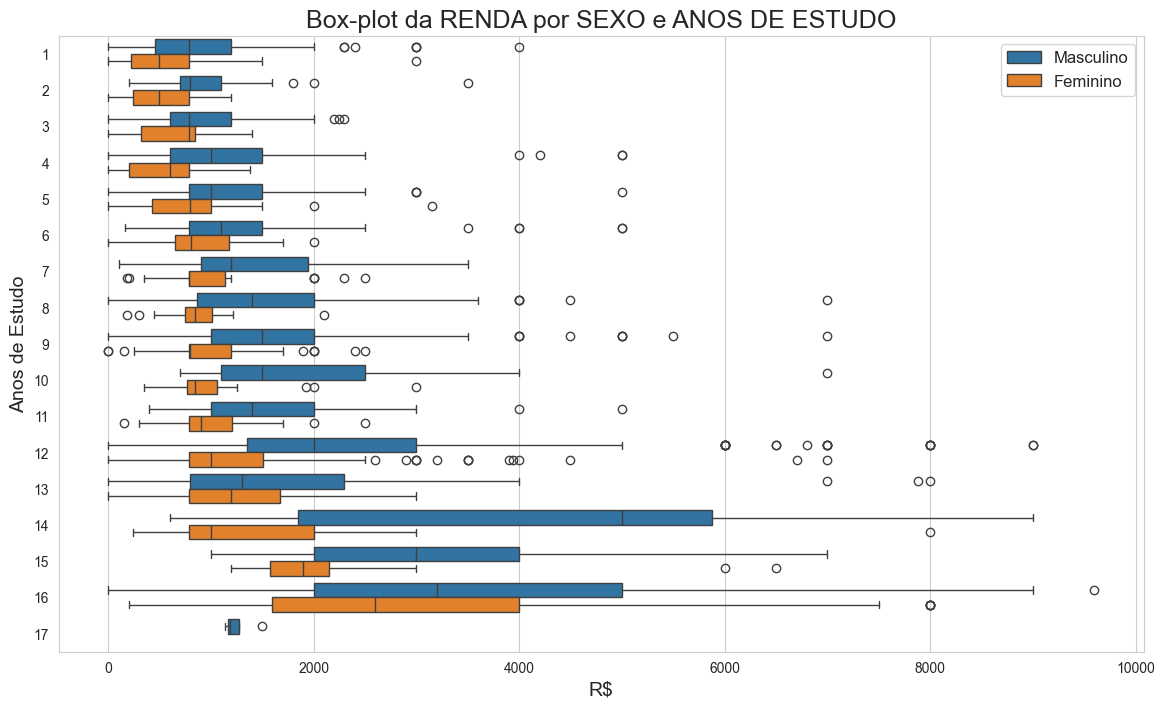

In [ ]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data = dados.query('Renda < 10000 and Idade == 50'), orient = 'h')

ax.figure.set_size_inches(14, 8)

ax.set_title('Box-plot da RENDA por SEXO e ANOS DE ESTUDO', fontsize = 18)

ax.set_xlabel('R$', fontsize = 14)

ax.set_ylabel('Anos de Estudo', fontsize = 14)
# ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize = 12) - desatualizado



# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize = 12)

ax

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [ ]:
renda_estatisc_uf = dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']}).round(2)
renda_estatisc_uf.rename(index=uf)

Renda                         
                        mean  median     max      std
UF                                                   
Rondônia             1789.76  1200.0   50000  2406.16
Acre                 1506.09   900.0   30000  2276.23
Amazonas             1445.13   900.0   22000  1757.94
Roraima              1783.59  1000.0   20000  2079.66
Pará                 1399.08   850.0   50000  2053.78
Amapá                1861.35  1200.0   15580  2020.69
Tocantins            1771.09  1000.0   60000  2934.59
Maranhão             1019.43   700.0   30000  1887.82
Piauí                1074.55   750.0   40000  2373.36
Ceará                1255.40   789.0   25000  1821.96
Rio Grande do Norte  1344.72   800.0   15500  1651.81
Paraíba              1293.37   788.0   30000  1950.27
Pernambuco           1527.08   900.0   50000  2389.62
Alagoas              1144.55   788.0   11000  1237.86
Sergipe              1109.11   788.0   16000  1479.00
Bahia                1429.65   800.0  200000  3507.92
Minas Gerais         2056.43  1200.0  100000  3584.72
Espírito Santo       2026.38  1274.0  100000  3513.85
Rio de Janeiro       2496.40  1400.0  200000  5214.58
São Paulo            2638.10  1600.0   80000  3503.78
Paraná               2493.87  1500.0  200000  4302.94
Santa Catarina       2470.85  1800.0   80000  3137.65
Rio Grande do Sul    2315.16  1500.0   35000  2913.34
Mato Grosso do Sul   2262.60  1500.0   42000  3031.42
Mato Grosso          2130.65  1500.0   35000  2542.63
Goiás                1994.58  1500.0   30000  2221.93
Distrito Federal     4241.95  2000.0  100000  5550.46

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

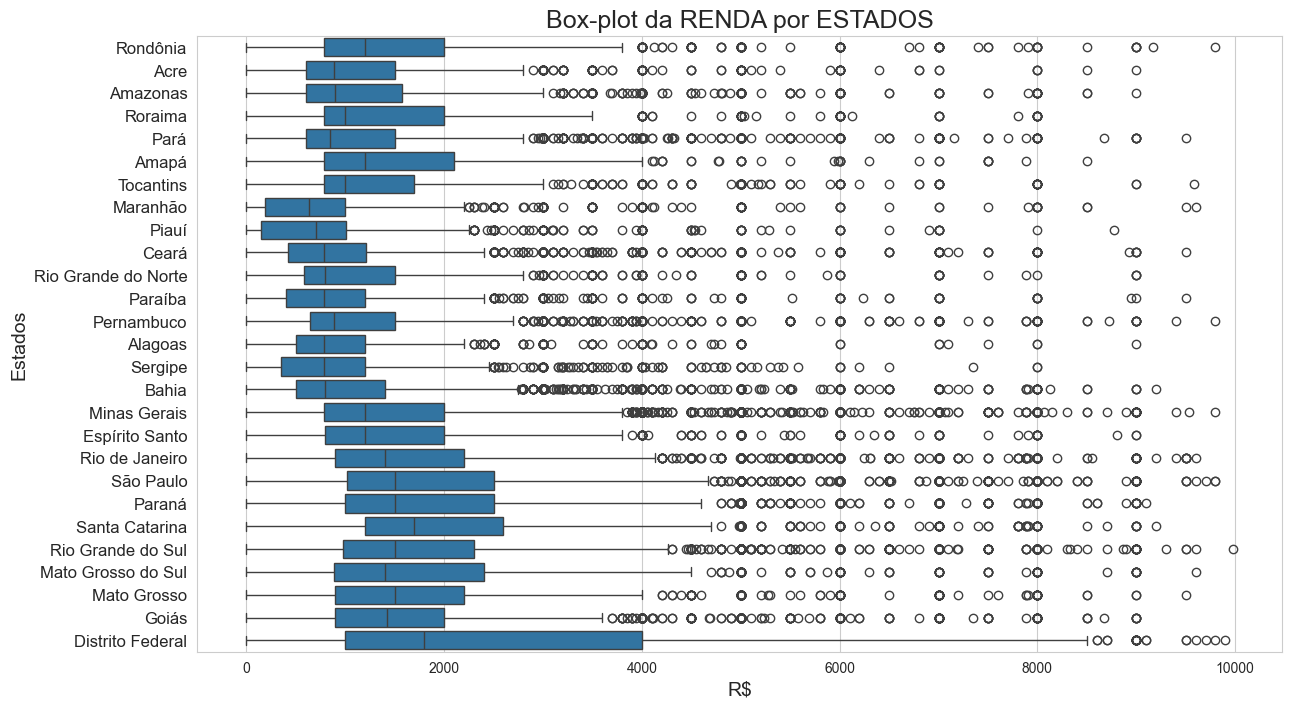

In [ ]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data = dados.query('Renda < 10000'), orient = 'h')

ax.figure.set_size_inches(14, 8)

ax.set_title('Box-plot da RENDA por ESTADOS', fontsize = 18)
ax.set_xlabel('R$', fontsize = 14)

ax.set_ylabel('Estados', fontsize = 14)
# ax.set_yticklabels([key for key in uf.values()], fontsize = 12)

ax.set_yticks(range(len(uf.values())))  # Define o número de ticks com base na quantidade de estados
ax.set_yticklabels([key for key in uf.values()], fontsize = 12)


plt.show()

C:\Users\BI\AppData\Local\Temp\ipykernel_10184\2916899308.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Renda', y='UF', data=dados.query('Renda < 10000'), orient='h', palette='Blues')


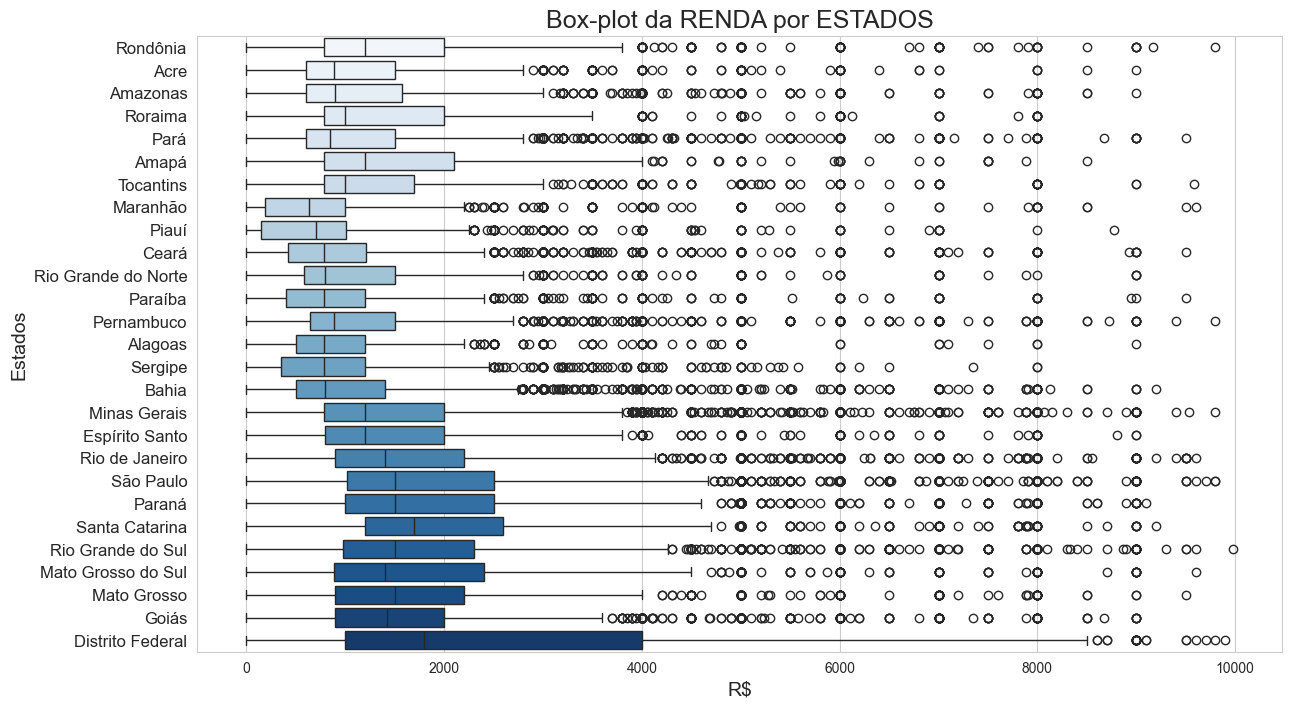

In [96]:
# Usando uma paleta de cores predefinida pelo Seaborn (por exemplo, "Blues")
ax = sns.boxplot(x='Renda', y='UF', data=dados.query('Renda < 10000'), orient='h', palette='Blues')

ax.figure.set_size_inches(14, 8)

ax.set_title('Box-plot da RENDA por ESTADOS', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Estados', fontsize=14)

# Define o número de ticks com base na quantidade de estados
ax.set_yticks(range(len(uf.values())))
ax.set_yticklabels([key for key in uf.values()], fontsize=12)

plt.show()


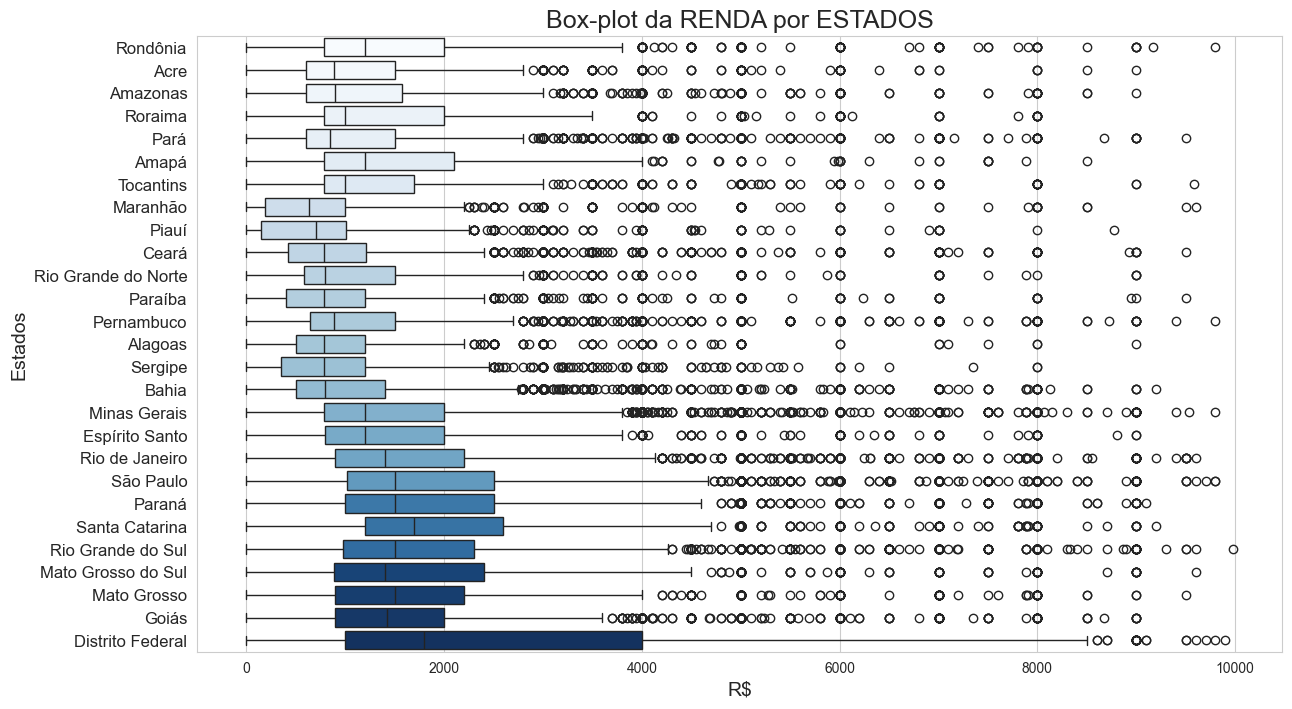

In [98]:
'''
O aviso que apareceu em cima do gráfico acima, indica que, em versões futuras do Seaborn, 
o uso do parâmetro palette sem definir a variável hue será descontinuado. 

Para resolver isso, você pode passar a variável do eixo y (neste caso, 'UF') para o parâmetro hue, 
o que tornará a paleta de cores associada a cada valor de 'UF'. Além disso, o aviso recomenda que, 
se você não quiser exibir a legenda gerada pelo hue, deve definir legend=False.

'''


ax = sns.boxplot(x='Renda', y='UF', data=dados.query('Renda < 10000'), orient='h', hue='UF', palette='Blues', legend=False)

ax.figure.set_size_inches(14, 8)

ax.set_title('Box-plot da RENDA por ESTADOS', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Estados', fontsize=14)

# Define o número de ticks com base na quantidade de estados
ax.set_yticks(range(len(uf.values())))
ax.set_yticklabels([key for key in uf.values()], fontsize=12)

plt.show()


> ### Conclusões

Escreva suas conclusões aqui...